In [1]:
# jupyter nbconvert --to python test_software_dev_version.ipynb test_software_dev_version.py
%reset -f
import importlib
import numpy as np
import matplotlib.pyplot as plt

import sys

import Frog
importlib.reload(Frog)
import Frog.toolbox as toolbox
import Frog.frog_data_analysis as frog_data_analysis

import pickle
import time
from scipy.optimize import curve_fit


# Load the results

In [2]:
# The directory where is located the FROG results:
directory = '/home/glebreton/Software/frog/Doc/Tutorial_files/Space_discretization'

GP, L_moleculetype_result = frog_data_analysis.load_result(directory, name_result='L_moleculetype_result.p', what_to_print=['general info', 'diagram info'])


Loading the results from the directory: /home/glebreton/Software/frog/Doc/Tutorial_files/Space_discretization the MT resulting list is supposed to be called: L_moleculetype_result.p according to the "name_result" optional argument.

Succesfull loading!

######################## Some general information: ########################

The MD topology (GP.MD_file_name_topology) and trajectory (GP.MD_file_name_traj) files used are:  /home/glebreton/Software/frog/Doc/Tutorial_files/Space_discretization/Molecule_times/frog_topology.pqr /home/glebreton/Software/frog/Doc/Tutorial_files/Traj/Tuto_get_strated/traj_get_strated.dcd
The number of time step is (GP.nbr_time_step):  2
The number of MD frame skipped between 2 treated ones is (GP.trotter_step):  0
Here is the list of the available MT:  ['Water_TIP4P2005']
Here are the typical dimension of the simulation box in the x,y,z directions (GP.box_size):  [ 34.5  34.5 150. ]



############## Some information about the diagram available: ###########

# Individual value

## Plane

In [3]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'density_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

# To have access to its diagram parameter object:
for KKK in range(0, len(L_moleculetype_result), 1): # finding the MT 
    if L_moleculetype_result[KKK].name == MT_name:
        K_MT = KKK

for k in range(0, len(L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram), 1): # finding the sdparameter relative to the diagram asked
    diagram_name = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k].name
    if diagram_name == name_diagram:
        my_diagram_sdparameter = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k]
        
# In the Plane_ij case: 
L_xyz = ['x', 'y', 'z'] # my_diagram_sdparameter.discretization_type stores the discretized laboratory axis using this correspondance 
print('The number of bin used to discretize the ' + L_xyz[my_diagram_sdparameter.discretization_type] + ' laboratory axis is:',
      my_diagram.size[0])
print('Note that these values are the same:', my_diagram.size[0], my_diagram_sdparameter.bin_size[0], len(my_diagram.axis_space.value))
print('The box size in the ' + L_xyz[my_diagram_sdparameter.discretization_type] + 'laboratory axis is', GP.box_size[my_diagram_sdparameter.discretization_type])
print('The my_diagram.axis_space.value is:', my_diagram.axis_space.value)
print('The my_diagram.axis_space unit is:', my_diagram.axis_space.unit.print_unit())


The number of bin used to discretize the z laboratory axis is: 150
Note that these values are the same: 150 150 150
The box size in the zlaboratory axis is 150.0
The my_diagram.axis_space.value is: [  0.           1.00671141   2.01342282   3.02013423   4.02684564
   5.03355705   6.04026846   7.04697987   8.05369128   9.06040268
  10.06711409  11.0738255   12.08053691  13.08724832  14.09395973
  15.10067114  16.10738255  17.11409396  18.12080537  19.12751678
  20.13422819  21.1409396   22.14765101  23.15436242  24.16107383
  25.16778523  26.17449664  27.18120805  28.18791946  29.19463087
  30.20134228  31.20805369  32.2147651   33.22147651  34.22818792
  35.23489933  36.24161074  37.24832215  38.25503356  39.26174497
  40.26845638  41.27516779  42.28187919  43.2885906   44.29530201
  45.30201342  46.30872483  47.31543624  48.32214765  49.32885906
  50.33557047  51.34228188  52.34899329  53.3557047   54.36241611
  55.36912752  56.37583893  57.38255034  58.38926174  59.39597315
  60.40268

In [4]:
# Example of discretization:
Axis_of_discretization = 2 # Z laboratory axixs

mean_position = L_moleculetype_result[0].L_molecule[0].mean_position
z_mean_position = mean_position[Axis_of_discretization]
nbr_bits = my_diagram.size[0]
y_min = 0
y_max = GP.box_size[2]

print('Box size along the z direction:', GP.box_size[2])
print('Number of bin to discretize the observable "mean position" along the z-axis:', my_diagram.size[0])
print('The mean position ' + str(z_mean_position) + ' correspond to the bin number:', toolbox.binarize_array(z_mean_position, nbr_bits, y_min, y_max, pbc=False))

Box size along the z direction: 150.0
Number of bin to discretize the observable "mean position" along the z-axis: 150
The mean position 72.50268 correspond to the bin number: 72


## Layer

In [5]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'density_layer'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

# To have access to its diagram parameter object:
for KKK in range(0, len(L_moleculetype_result), 1): # finding the MT 
    if L_moleculetype_result[KKK].name == MT_name:
        K_MT = KKK

for k in range(0, len(L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram), 1): # finding the sdparameter relative to the diagram asked
    diagram_name = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k].name
    if diagram_name == name_diagram:
        my_diagram_sdparameter = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k]
        
# In the Layer case: 

print('The number of layer used to discretize all the system is ' + str(my_diagram_sdparameter.bin_size[0]) + ' which correspond to 2N+1, N being the input in the parameter file. N layer are used for the bottom interface, N for the upper, and 1 for the bulk-like phase.')
print('Note that these values are the same:', my_diagram.size[0], my_diagram_sdparameter.bin_size[0], len(my_diagram.axis_space.value))
print('The my_diagram.axis_space.value is:', my_diagram.axis_space.value, 'The negative value are for the lower interface, the positive for the upper interface. 0 stands for the bulk-like area.')
print('The my_diagram.axis_space unit is:', my_diagram.axis_space.unit.print_unit())


The number of layer used to discretize all the system is 13 which correspond to 2N+1, N being the input in the parameter file. N layer are used for the bottom interface, N for the upper, and 1 for the bulk-like phase.
Note that these values are the same: 13 13 13
The my_diagram.axis_space.value is: [-6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6] The negative value are for the lower interface, the positive for the upper interface. 0 stands for the bulk-like area.
The my_diagram.axis_space unit is: Layer


In [6]:
print('Diagram name,', 'Number of layer per interface')
for k in range(0, len(L_moleculetype_result[0].mtparameter.dparameter.L_diagram), 1): 
    diagram_name = L_moleculetype_result[0].mtparameter.dparameter.L_diagram[k].name
    my_diagram_sdparameter = L_moleculetype_result[K_MT].mtparameter.dparameter.L_diagram[k]
    if my_diagram_sdparameter.discretization_type == 10: #layer type geometrical selection
        print(diagram_name, int((my_diagram_sdparameter.bin_size[0]-1)/2))
        
print('The maximal number of layer required is:', GP.layer_nbr_max)

Diagram name, Number of layer per interface
density_layer 6
molecular_orientation_layer 4
hbond_layer_Water_TIP4P2005 4
rdf_layer_Water_TIP4P2005 4
The maximal number of layer required is: 6


In [7]:
# Example of discretization:

mean_position = L_moleculetype_result[0].L_molecule[0].mean_position
layer_number = L_moleculetype_result[0].L_molecule[0].layer

print('The mean position ' + str(mean_position) + ' correspond to the layer number:', layer_number)

The mean position [10.431825   1.7479999 72.50268  ] correspond to the layer number: 0


# Density

## Plane discretization

In [8]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'density_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)
my_diagram.switch_unit_diagram('axis_space', 'length', 'nm', custom_change=False, molar_mass=False)
my_diagram.switch_unit_diagram('distribution', 'population', 'kg', custom_change=False, molar_mass=18)
my_diagram.switch_unit_diagram('distribution', 'length', 'dm')

density_plane_z = my_diagram.value/GP.nbr_time_step

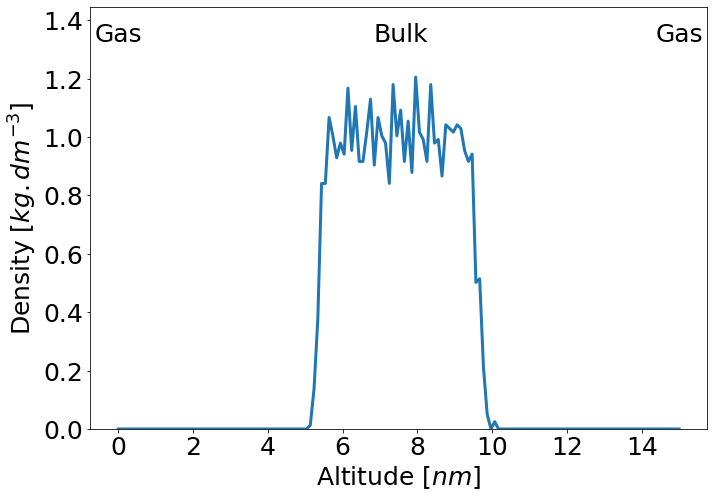

In [9]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value/GP.nbr_time_step, lw=3)

plt.text(my_diagram.axis_space.value[0], max(my_diagram.value/GP.nbr_time_step)*1.1, 'Gas', fontsize=25, ha='center')
plt.text(my_diagram.axis_space.value[-1], max(my_diagram.value/GP.nbr_time_step)*1.1, 'Gas', fontsize=25, ha='center')
plt.text(my_diagram.axis_space.value[int(len(my_diagram.axis_space.value)/2)], max(my_diagram.value/GP.nbr_time_step)*1.1, 'Bulk', fontsize=25, ha='center')
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Density [$' + my_diagram.unit.print_unit() + ']$', fontsize=25)
plt.ylim([0, max(my_diagram.value/GP.nbr_time_step)*1.2])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

## Layer discretization

In [10]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'density_layer'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

L_density_layer_x = my_diagram.axis_space.value
L_density_layer = my_diagram.value # here is printed the numbe of molecule found in the relative layer, not a density (ie not [molecule/volume], juste [molecule])

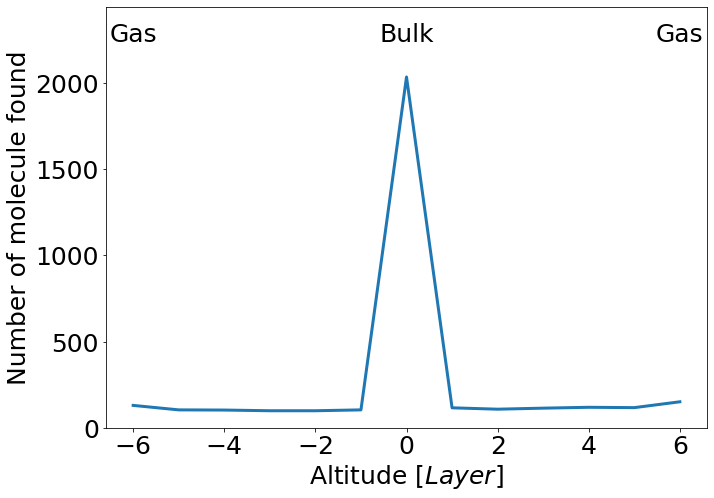

In [11]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.value, lw=3)

plt.text(my_diagram.axis_space.value[0], max(my_diagram.value)*1.1, 'Gas', fontsize=25, ha='center')
plt.text(my_diagram.axis_space.value[-1], max(my_diagram.value)*1.1, 'Gas', fontsize=25, ha='center')
plt.text(0, max(my_diagram.value)*1.1, 'Bulk', fontsize=25, ha='center')
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Number of molecule found', fontsize=25)
plt.ylim([0, max(my_diagram.value)*1.2])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

# Molecular Orientation

## Plane 

In [12]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'molecular_orientation_slice_z'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

No handles with labels found to put in legend.


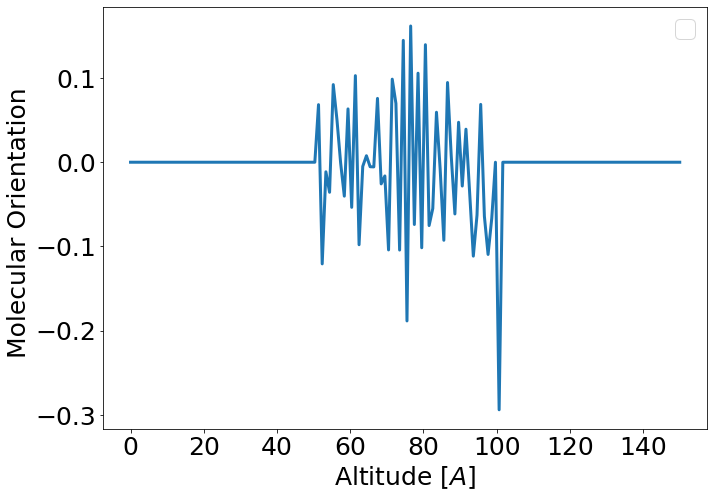

In [13]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[2], lw=3)

#plt.xlim([85, 105])
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Molecular Orientation ', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

## Layer

In [14]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'molecular_orientation_layer'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

No handles with labels found to put in legend.


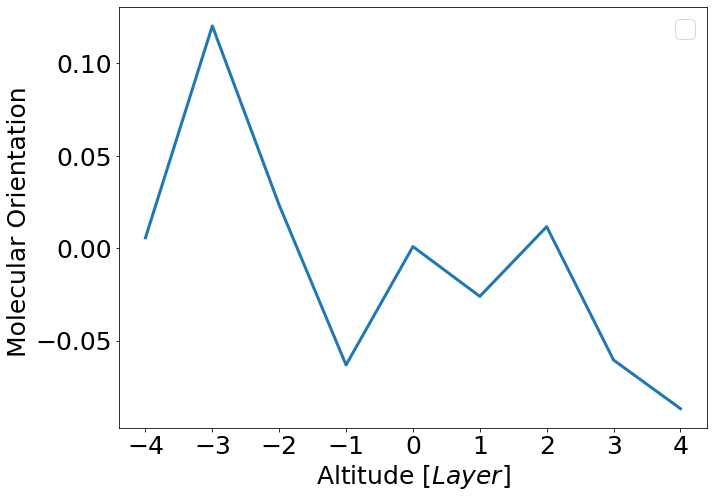

In [15]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[2], lw=3)

#plt.xlim([85, 105])
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'Molecular Orientation ', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

# H-bond

## Plane

In [16]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'hbond_slice_z_Water_TIP4P2005'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

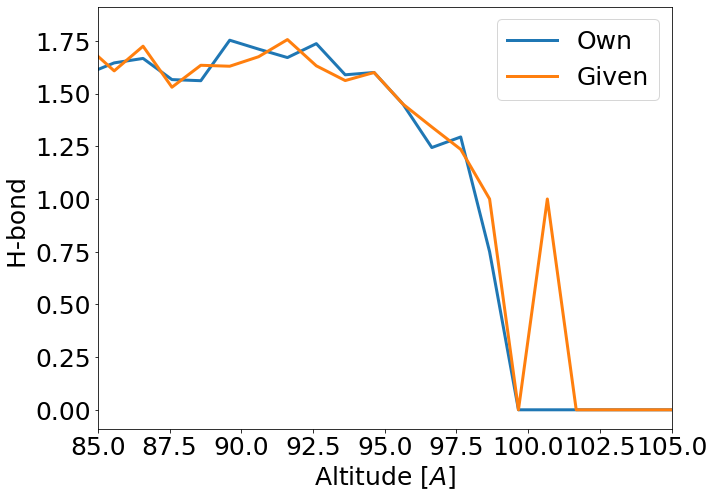

In [17]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[0], lw=3, label='Own')
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[1], lw=3, label='Given')
plt.xlim([85, 105])
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'H-bond ', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

## Layer

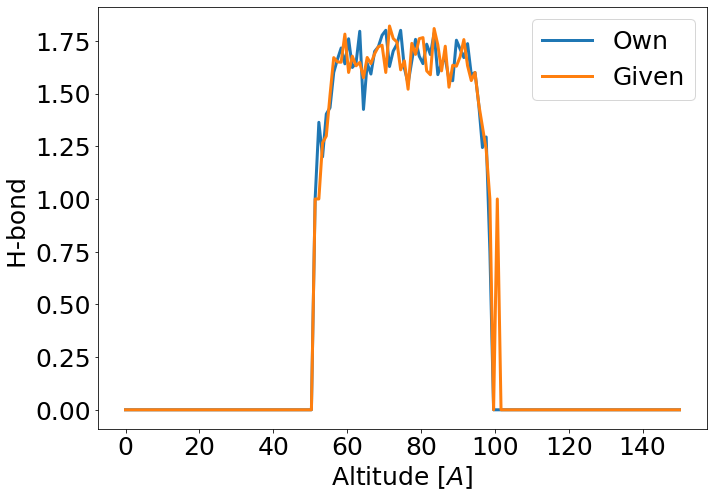

In [18]:
plt.figure(1, figsize=(10, 7))
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[0], lw=3, label='Own')
plt.plot(my_diagram.axis_space.value, my_diagram.mean.T[1], lw=3, label='Given')
#plt.xlim([85, 105])
plt.xlabel(r'Altitude [$' + my_diagram.axis_space.unit.print_unit() + ']$', fontsize=25)
plt.ylabel(r'H-bond ', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


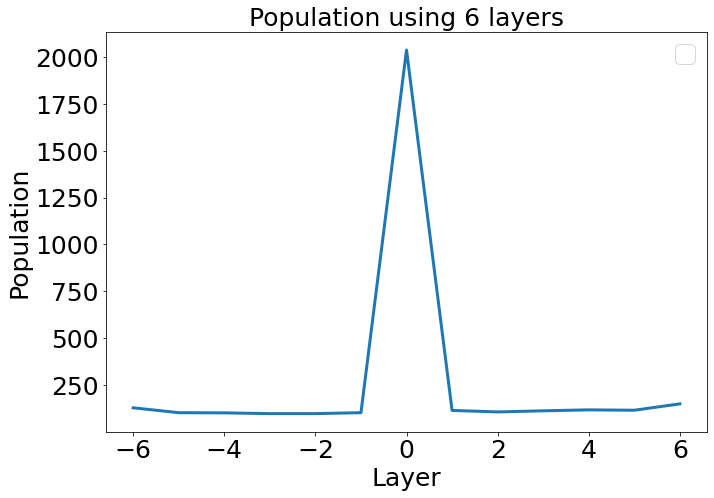

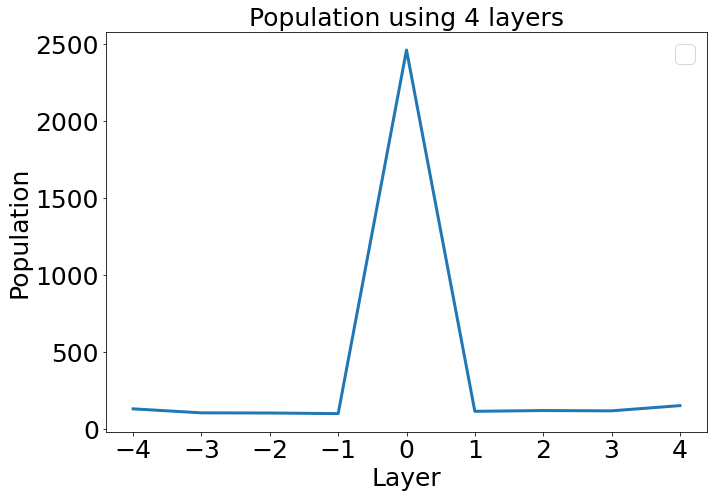

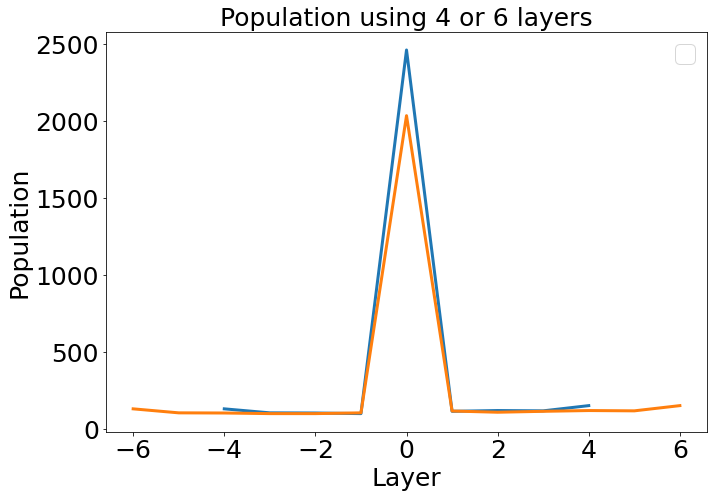

In [22]:
# To load 
MT_name = 'Water_TIP4P2005'
name_diagram = 'hbond_layer_Water_TIP4P2005'
my_diagram = frog_data_analysis.return_diagram(GP, L_moleculetype_result, MT_name, name_diagram)

plt.figure(1, figsize=(10, 7))
plt.title('Population using 6 layers', fontsize=25)
plt.plot(L_density_layer_x, L_density_layer, lw=3)
plt.xlabel(r'Layer', fontsize=25)
plt.ylabel(r'Population', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


plt.figure(2, figsize=(10, 7))
plt.title('Population using 4 layers', fontsize=25)
plt.plot(my_diagram.axis_space.value, my_diagram.axis_population, lw=3)
plt.xlabel(r'Layer', fontsize=25)
plt.ylabel(r'Population', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

plt.figure(3, figsize=(10, 7))
plt.title('Population using 4 or 6 layers', fontsize=25)
plt.plot(my_diagram.axis_space.value, my_diagram.axis_population, lw=3)
plt.plot(L_density_layer_x, L_density_layer, lw=3)
plt.xlabel(r'Layer', fontsize=25)
plt.ylabel(r'Population', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

L_new_density_layer-my_diagram.axis_population: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


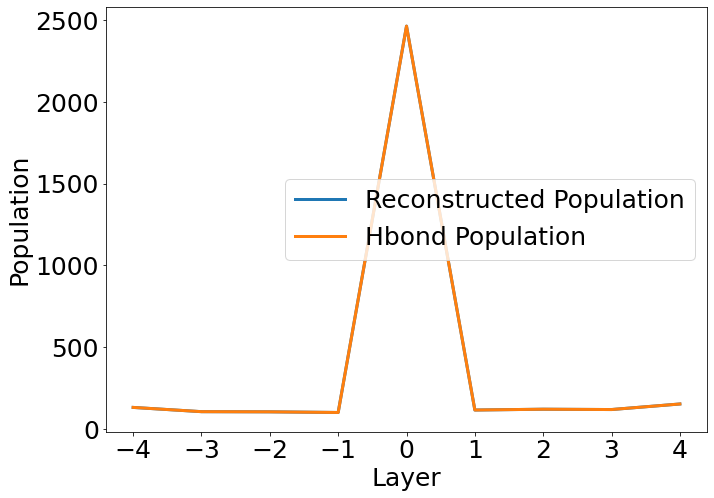

In [21]:
L_new_layer_x = [k for k in range(-4, 5, 1)] # the values goes from -4 to +4
L_new_density_layer = np.zeros(9) 

trotter = 0
for k in range(0, 4, 1): # bottom interface 
    L_new_density_layer[k] = L_density_layer[trotter] # the most outter layer of the original density correspond to the new layers 
    trotter +=1
    
for k in range(-2, 3, 1):
    L_new_density_layer[4] += L_density_layer[trotter] # the layers called -2 to 2 in the original density is know refers as 0 (bulk phase). In other words, the inner layer are now assigned to the bulk-like phase.
    trotter += 1
    
for k in range(5, 9, 1): # upper interface
    L_new_density_layer[k] = L_density_layer[trotter] 
    trotter += 1
               
plt.figure(1, figsize=(10, 7))
plt.plot(L_new_layer_x, L_new_density_layer, label = 'Reconstructed Population', lw=3)
plt.plot(my_diagram.axis_space.value, my_diagram.axis_population, label = 'Hbond Population', lw=3)
plt.xlabel(r'Layer', fontsize=25)
plt.ylabel(r'Population', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
print('L_new_density_layer-my_diagram.axis_population:', L_new_density_layer-my_diagram.axis_population)